# Sklearn

## sklearn.linear_model

In [2]:
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [3]:
%pylab inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [4]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

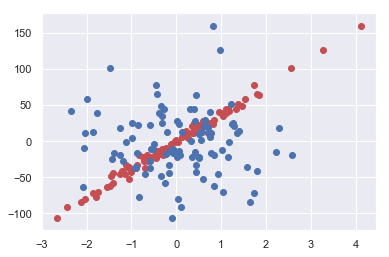

In [16]:
pylab.scatter(list(map(lambda x: x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color = 'b')

In [19]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [21]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [22]:
print(test_labels)

[101.14760598 -36.44717565 -10.29545833 -11.18242389 -45.27502383
 -91.477377    24.82763821 -76.75213382 -45.38589148 -37.31870104
 -16.79027112 -16.65927231 -32.71074998  13.31981235 -16.30914909
  44.41658249 -22.32195021  64.19559505 -14.97110322   0.34799656
  -0.74051877  49.41686419  17.64282734  12.74038341 -35.32062686
  19.66406455 -19.36956003  28.15553021 126.64909941 -40.84204295]


In [23]:
print(predictions)

[ 97.42953806 -42.14837821 -11.70535158 -13.61583546 -49.07054234
 -95.08752289  30.65942331 -70.61679834 -45.02753019 -35.99037607
 -15.38539027 -15.26800749 -44.53172032  14.21668817 -12.64355564
  44.35191745 -23.35192567  70.47903814 -13.17072453  -2.20587235
   0.3669939   55.92868309  21.46787401   6.83846998 -42.74499204
  26.44662448 -32.89011767  22.50467606 126.64928716 -47.41162124]


In [24]:
metrics.mean_absolute_error(test_labels, predictions)

4.084278586613433

In [28]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779699, std: 1.073710449289019


In [25]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [29]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779699, std: 1.073710449289019


In [30]:
coef

array([38.07925837,  0.        ])

In [31]:
linear_regressor.coef_

array([38.74316288,  0.39446366])

In [32]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.8013926128489359

In [34]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [35]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.74*x1 + 0.39*x2 + -0.80


#### Lasso

In [36]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [38]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666395, std: 1.0170354384993354


In [39]:
print(lasso_regressor.coef_)

[37.85523173  0.        ]


In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [35]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}.".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1], lasso_regressor.intercept_))

y = 37.99*x1 + -0.00*x2 + -0.79.
